# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

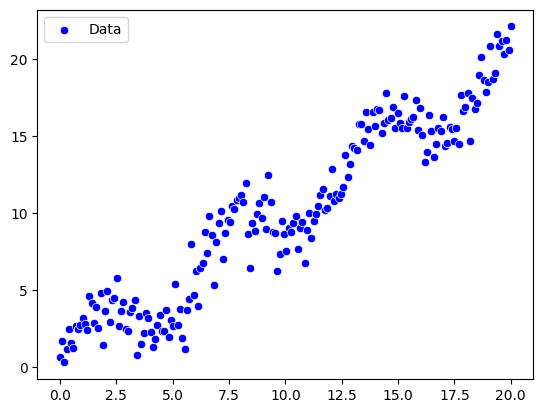

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([0.6233]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.6542]])]

In [257]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Sequential(
    nn.Linear(in_features,128),
    nn.ReLU(),
    nn.Linear(128,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,out_features),
)



In [258]:
loss_fn = nn.MSELoss()

In [259]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.0001)

In [260]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [261]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [274]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.8260114192962646
6.951462984085083
11.78851056098938
15.783594846725464
16.049399077892303
21.84109514951706
24.17285054922104
26.414264142513275
27.263542771339417
28.390719056129456
28.414146699011326
28.646715871989727
32.140434734523296
33.03387378901243
36.34305214136839
37.296632401645184
37.43788842111826
37.52621751278639
40.780010275542736
46.16416793316603
47.7166276499629
48.35298513621092
50.37892221659422
50.400308422744274
50.59404907375574
50.6215099748224
55.57258648239076
57.33255738578737
57.33664717897773
60.118086244910955
62.772938158363104
67.2941988967359
73.29346456751227
74.15892400965095
74.15912949266203
75.80915581407316
78.31508456887968
94.870185963533
97.6888967675186
101.05476748170622
109.50609099092253
109.57299245121249
110.15621048929461
112.14473504545458
118.32533425810107
120.57460040571459
120.75640369179018
121.95607889415987
129.50754154445895
131.1699183058954
131.84013933660754
150.38261980535754
153.39211220266588
165.61482376577624
165.79

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.206457138061523
8.424875378608704
11.626425385475159
33.95365011692047
33.975522795692086
50.66594294644892
51.61228511668742
51.698730455711484
52.108230816200376
52.16187988780439
52.37399592064321
52.45257104001939
52.48871728219092
54.6062221173197
56.882617676630616
58.53705211915076
79.41258045472205
83.864984953776
84.20321738161147
86.40552412904799
86.76834305562079
87.89054735936224
87.9351861383766
89.3623853828758
90.93472372554243
91.7284480240196
92.0770930852741
92.2641624417156
98.92700519226491
99.99161901138723
102.15442671440542
102.40071742795408
102.40540752839297
104.44450555276126
107.611183504574
124.03710780572146
124.34463007282466
125.92499549221247
128.27781326603144
133.40015871357173
133.57326024305075
133.9127815021202
134.21460729371756
134.76295524369925
136.49375718366355
136.5986574171111
137.28038500528783
137.9809109447524
138.52024840097874
145.69267557840794
147.45301495771855
151.49710379820317
164.9722558138892
167.6699334261939
167.7740388838

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.778595924377441
16.132107973098755
16.417887061834335
16.67339137196541
17.45004317164421
33.16278502345085
33.3893788009882
34.52117778360844
48.66814376413822
51.56023479998112
55.48405911028385
56.136928632855415
60.45896919071674
60.720999017357826
62.93536974489689
72.81300760805607
74.48733665049076
74.48905985802412
77.49326055496931
77.49355011319858
78.15628140306217
90.37661259507877
91.32210516071063
91.73612417912227
92.25000121330959
93.28589739536983
101.45542349552852
101.46154565204051
105.29870957721141
107.59045500148204
107.6070491487917
107.95219598364201
108.23271776389447
108.9357072825369
109.36673693012563
113.77423147510854
122.07091192554799
122.53591842603055
122.53610943634703
123.75002001602843
124.29348211367324
125.93679480631545
126.1150643267174
126.48760965843394
128.54323557396128
129.53440884132579
135.4749968387623
136.0078961588879
137.1224058606167
137.4798117615719
138.2064903118153
140.08387080211833
140.80944863338664
143.4850558378239
149.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18153338134288788
2.854422375559807
2.8784931395202875
3.353833505883813
3.370696982368827
11.551920851692557
11.677935367450118
17.127720123156905
26.161511665210128
33.69263578020036
35.819439178332686
36.92927563749254
37.00153738819063
38.21441847644746
44.751609867438674
45.85935360752046
68.16489369235933
70.73257881961763
70.96611735783517
71.13636991940439
71.89099434576929
73.98836592398584
76.27086499892175
82.2714667674154
91.92562345229089
94.8665185328573
96.89468649588525
97.61037943325937
101.99253151379526
117.39620373211801
118.10594848357141
118.167032757774
119.35970715619624
125.05695275403559
125.06948190927505
128.51329332590103
129.12744104862213
135.6231151819229
135.92069977521896
136.11505292356014
154.48889707028866
156.98660491406918
157.878782376647
168.4529019445181
168.51351619139314
168.69110505655408
169.8084350116551
170.71161787584424
171.4681924469769
171.84573947265744
181.03457747772336
183.060476411134
183.102938875556
183.10314212270896
183.267

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.041243553161621
19.47443962097168
22.50393009185791
22.715632796287537
28.288981318473816
28.49883110821247
29.366737380623817
31.611212506890297
31.6190164280124
37.72085978509858
39.67563106538728
44.37791969301179
46.17411305429414
47.77850617887452
52.61341657163575
55.46188869001344
55.984912891406566
71.53407861711457
72.97419025423005
73.66071434738114
73.83950166823342
74.72875576140359
74.97312114061788
81.98759505571797
84.81394836725667
87.24001262011006
98.09074828447774
98.34444687189534
99.8455425244756
103.24086627783254
106.56128940405324
108.86481914343312
108.92930496158078
109.76393676223233
112.26832294883206
119.33759165229276
120.13627708377317
120.63744783820584
121.01239407481626
121.21906334580854
122.24444908322766
122.3967435550876
123.54296984197572
124.12629642011598
124.17349061043933
124.17448730277829
129.138380716322
129.2150029714685
129.25099725159816
132.26963562401943
133.95108014973812
134.23055834206752
137.34121460351162
143.2459816399496
144.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9831231236457825
1.7307209372520447
19.402609288692474
30.51572746038437
36.08561843633652
36.093595509417355
36.72562444675714
43.70064533222467
43.70076798829541
43.72808211292431
44.333089940206264
44.77513097967312
44.78237318150059
48.977893582501565
49.97444044701115
51.273290625729715
53.232832304158364
58.38737093559757
59.03363036266819
89.78122710339085
89.83006966389075
104.06381905353919
105.65618408001319
106.65304988897697
120.48157733953849
120.4823985745461
123.29191357393574
123.40614520509553
123.68956666190934
123.83821842570615
124.3810398926289
126.98290399213147
131.3606291164906
131.36171709345945
132.9056310539163
133.11466490077146
133.3617935662187
134.08206348466047
134.54790734099515
146.51056717681058
149.25814293669828
157.52930687712796
159.08921276377805
159.16299836682447
159.4766212587274
174.2522674684442
174.29432607041963
175.87972605573304
180.26486504422792
188.2096678053058
189.34718907224305
189.79810479628213
191.30436697947152
191.6949371431

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.3382463455200195
5.34390914440155
17.274126887321472
18.405951261520386
18.66846951842308
18.901718720793724
18.94978654757142
25.607829932123423
25.63002643547952
27.988659715279937
37.116188859567046
37.12811136525124
38.894916418008506
39.44175136368722
39.63686792831868
40.761067318730056
41.764249372296035
44.96461515408009
45.35558237414807
45.366865925490856
52.79470234364271
53.656369142234325
54.021280877292156
54.181409530341625
54.38066603988409
58.211624167859554
60.23507788032293
64.18116071075201
70.27416398376226
78.7212627157569
83.59098698943853
87.68255450576544
89.84200312942266
95.82567527145147
106.10451056808233
110.39163234084845
114.68166901916265
114.77074625343084
115.63152577728033
116.12165903300047
116.25748836249113
127.67787276953459
127.74765864759684
147.43422404676676
148.50357118993998
148.9538947418332
150.47569812089205
151.34549785405397
151.4308798611164
151.7046964764595
164.28911191225052
164.8482260107994
165.49427849054337
173.6148458123207


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.479104042053223
14.721668720245361
22.200754642486572
35.065845012664795
35.203498259186745
37.11526907980442
37.16060367971659
38.2524893656373
39.547455824911594
40.3055774345994
40.524579502642155
50.63577411323786
50.89584127813578
50.98060243576765
51.26395892351866
51.45648666471243
51.53574822098017
51.87469566613436
54.60794294625521
67.07707346230745
70.13675940781832
70.69864160567522
70.70431000506505
71.24227840220556
71.41973889386281
72.49858725583181
74.69907796895131
78.1879891208373
78.18965923995711
80.1123796722386
84.2703501007054
86.39665138931014
88.5720862171147
88.65395602048375
88.88555831671692
89.40500153065659
91.2933036184404
92.05743397236802
93.53830016613938
95.69677628041245
99.43525136471726
114.41202462674119
128.4641267156694
128.46499133453472
128.5057821010123
138.72615525469882
150.254747364379
156.98751399264438
163.6105274890433
163.71961950109107
166.8743884448777
168.06581341073615
168.28197913215263
171.33700518653495
173.81366567657096
17

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.018738461658358574
0.8565464150160551
0.8587510853540152
5.0747387676965445
5.075910541811027
5.901204321184196
11.399094793596305
11.47582191566471
13.401125851669349
15.675515357055701
32.699626151123084
33.20351088384632
33.204871318419464
34.78446950681973
34.86456444032956
36.28318848379422
40.98575844534207
47.66431584127713
47.799980721552856
52.980013451655395
53.37945791252423
56.81729765899945
58.05254503258038
59.00400223501492
59.81376125582028
60.36248852976132
60.89950986870099
63.19898267753888
65.9591815090971
69.79695077904034
78.3830370522337
78.98367180593777
83.71308197744656
83.88865449198056
83.92501318373252
84.63049811043311
84.63345031172503
87.41671709448565
87.42195217276458
88.1465298976982
101.41584370995406
102.54148708248977
102.6630073186243
102.71770964527968
105.99285183812026
115.40354405308608
115.40354406640199
115.52623265788225
116.10532206103471
116.39372658536104
116.51452780321506
124.9535651262131
126.10325933054355
129.4269220884171
133.145

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2655850052833557
4.841987192630768
8.718692362308502
10.852634966373444
12.18769496679306
24.215779721736908
24.778448522090912
25.147404074668884
25.214103661477566
29.00440212339163
36.20975824445486
36.31473756581545
38.36612416058779
39.66372550278902
40.305549032986164
40.40289052575827
41.48737057298422
41.52742296457291
43.42158359289169
43.8758978843689
44.25591239333153
51.37693175673485
51.52278287708759
61.59608896076679
63.33097334206104
64.19929899275303
64.29212591052055
65.12786111235619
67.78291806578636
75.44445523619652
77.76372417807579
79.73652395606041
89.63593992590904
106.52606138586998
106.56000624224544
106.59481075406075
107.86861136555672
117.10340502858162
117.40167751908302
117.98344567418098
118.43884178996086
140.8634805381298
145.19591662287712
150.89918276667595
151.35245886445045
153.37257686257362
156.42236104607582
158.7564276754856
159.81667259335518
159.87230292335153
160.67117843404412
162.89525828137994
164.26888463273644
177.7584714628756
179.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.695466041564941
8.179424524307251
8.824903726577759
9.09990182518959
15.676321655511856
29.891170173883438
33.86151638627052
33.9198414683342
35.551940739154816
37.788308680057526
40.1825709939003
40.339033633470535
42.8443343937397
43.39102831482887
49.352214723825455
52.23849621415138
56.24763002991676
59.387975841760635
59.46610302478075
60.869793362915516
61.36948699504137
61.4396767988801
62.4652431383729
63.05177602916956
63.05240703257732
63.36449421080761
63.44800255331211
66.8742310765665
69.17618916067295
76.43530628713779
84.77997372183017
85.53816012176685
96.53999022278003
99.87048224243335
100.87605754169635
100.89706829632632
101.93683413113467
106.02280119503848
106.10345796192996
108.92530778492801
109.0998016342055
112.22794160689227
114.04623315180652
114.11321406508796
120.68802457000129
125.03561549331062
125.10987930442207
126.59894089843147
126.60371457482688
126.61265790998004
126.63447547494434
130.0681998783257
131.2165345007088
137.6775678449776
138.2259289

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.09164896607398987
7.716337591409683
8.32536068558693
8.839045315980911
8.988778218626976
9.649991795420647
12.319034144282341
13.289282903075218
14.498962745070457
16.096697196364403
18.339510306715965
18.961889132857323
19.493554159998894
29.50593189895153
34.984201952815056
35.30472420156002
36.37103305757046
52.21867214143276
53.38500188291073
54.501446947455406
54.50398420216516
54.546767596621066
54.58053907426074
60.57095512421802
65.74045309098437
66.64045390160754
68.12529989751056
68.95874717505649
70.7998696831055
71.53528728755191
71.56992688821629
75.32098069833592
77.18091049836949
78.52603998826817
88.17751780198887
88.81758984969929
88.96764230774716
89.03727836953476
91.28401370393112
91.62031959043816
92.48274432169273
92.78805248485878
93.56529359566048
94.22619395004585
95.65366439567879
98.21905712829903
103.39654211746529
103.8382433806546
105.73331631766632
106.817525759805
110.37036337004974
116.67832340346649
117.84631659137085
117.87825325177982
118.109738067

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.314560890197754
11.463371530175209
15.666490331292152
18.512193217873573
18.59659270942211
18.64088449254632
18.88093053176999
20.014073241502047
25.680280555039644
31.354604113847017
38.661200392991304
40.20344125106931
40.295154612511396
47.11880687996745
58.30062202736735
58.4057463221252
60.5672920756042
65.1048749499023
65.79454283043742
66.36026893183589
66.39194155111909
66.59624417498708
71.80319197848439
96.8183000870049
97.42647059634328
113.82333262637258
115.68747099116445
120.26242025569081
123.20752008631825
123.23493051715195
145.83183527179062
149.8679499644786
151.4207197446376
151.98366254754364
153.7965486664325
154.3309347052127
154.6548346299678
154.6599673316814
167.92832556227222
197.67262640455738
201.63423243025318
201.73450291762128
201.7820795015432
203.25322596589103
212.08694903412834
216.29103343049064
220.44785468140617
220.54310052702203
221.71390610048547
224.69788866350427
224.9318587691523
224.9361710692756
226.82620204938576
227.31681849015877
228

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6177918910980225
12.09626841545105
12.286310255527496
12.520366176962852
14.815753921866417
19.405316337943077
23.094698175787926
23.47879682481289
30.19662080705166
30.717685028910637
33.466781899333
34.268754586577415
37.71125875413418
41.33755074441433
44.978105649352074
45.662586495280266
45.746988750994205
45.78226087987423
48.36416552960873
49.492745503783226
49.63850340247154
52.89112839102745
59.25331196188927
62.63492688536644
62.78790020942688
63.541605710983276
63.7027472704649
63.72918503545225
64.49129932187498
69.74373166821897
75.4677645470947
80.3170248772949
80.88465707562864
81.86610530875623
86.4941084291786
87.3385776784271
97.47477000020444
101.8246559407562
112.41826288960874
114.35751014016569
114.37654032744467
116.20325639285147
116.38417593576014
116.72106556035578
124.72614387609065
130.1225304994732
130.9675870332867
144.20937303639948
144.36244560219347
145.71265340782702
146.3075119946152
146.3199729239568
146.44288776721805
146.48133783321828
148.332978

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8422433137893677
1.9591440558433533
4.289765536785126
4.644927769899368
4.658166100271046
5.121633251197636
5.13859071675688
5.532599025405943
6.924707465805113
14.325973086990416
16.298748784698546
19.07568841520697
22.902888589538634
23.013379991985857
23.078287885524333
23.915999815799296
24.59307758603245
24.593663662788458
24.716579347965308
26.66729667794425
26.681710157659836
28.993303213384934
54.89591017749626
67.56080332782585
67.57759301189799
67.6054513809504
67.61610535264481
68.1859656322049
72.74801216006745
75.17553553462494
82.58619341731537
87.8482163894223
88.2433641004609
88.24375675231568
91.73633788138977
99.42627261191956
100.28124706060044
102.29756323606125
107.9037000349199
110.45260803014389
111.73045245916
112.76531414300553
118.38915924340836
119.6473579815065
119.79285840303055
120.04558904081932
120.81275106579415
120.82978426091722
121.17283214800409
128.43061317675165
131.44654812090448
131.62573082916788
134.11762435905985
134.4376705753093
136.30518

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.0875818729400635
3.125795930624008
4.543999761343002
4.755477860569954
4.803590968251228
6.277407243847847
9.208354070782661
9.236859222874045
11.788615128025413
13.35748734138906
17.320591351017356
27.61704578064382
28.33114697597921
28.777538200840354
29.689912816509604
30.161447247490287
32.35944887064397
33.16454782150686
33.9921601023525
38.109625121578574
38.16133547760546
39.476459512487054
51.22402096726
54.041015634313226
65.10815621353686
66.2915110681206
66.83292783237994
66.94703475572169
72.87323848344386
75.28094069100916
75.33567581139505
75.33586416854814
121.57533560409502
121.86614815607027
121.92328002392605
122.58994247853116
123.0698674851592
125.03459834396199
140.51848124801472
141.25124489604787
143.92626559078053
152.76194178401784
152.76196314674053
155.89157559257183
157.46784951072368
159.25452579837474
166.31650127750072
170.50979675632152
171.27056457381877
174.16032077651653
176.7690811334196
179.51278855186138
197.8860280690733
198.5871110139433
216.59

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.398176193237305
8.39901925745653
8.414174345612992
11.990754393220413
16.956896093965042
17.90540674078511
18.691287068009842
18.783762743056286
19.090079804242123
29.378983040631283
32.259624024212826
35.25484587746905
36.766818185627926
36.77078691060888
38.88207641179906
42.968506484583486
43.52788624103414
52.46051582630025
63.134728282049764
66.03983792598592
66.4825259440695
78.7736293071066
78.78610200277762
102.35615891806083
102.49339284590678
104.24950291804271
104.27173687546747
104.73270390956895
106.47313235729234
106.50130806706147
107.08501784346299
107.39967237255769
110.11120496533113
110.59588531992631
110.9765215649386
110.98015315557132
137.01183421636233
137.79576708102832
142.63950563693652
151.25277830386767
153.3171455981792
153.48202740872512
160.80902611935744
160.80928127423977
161.02351103679393
162.36566577808117
162.63095889941906
169.24172149554943
176.48986612216686
177.14643810645794
177.69471828595852
177.9970192159817
179.53500179902767
187.36894230

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.16291391849517822
0.4734489321708679
14.061935603618622
14.600884795188904
14.601441872538999
26.39603186887689
26.400637059705332
26.533539056079462
26.5773771062959
27.018575246678665
30.61676936899312
32.9685283259023
34.13858323846944
36.25535827432759
36.3588363409508
38.90840022568591
41.27781312470324
41.488658416317776
41.6174393624533
52.833387467311695
52.99917744402774
53.35517905955203
55.475254762219265
57.9420945525635
61.692858445690945
61.692959370309836
64.34192925899697
64.84370345085335
65.31920555442048
83.33567550986481
83.99167266696168
84.2046145817585
86.83480161636544
95.07515520065499
96.62755304783059
99.02306086033059
108.71107775181008
108.71342436828127
108.93174992360582
111.16924463071337
111.60349346556177
112.4859326020669
112.62449456610193
112.88526008882036
113.42299769677629
118.08747218408098
118.95076815642824
119.0522885084938
121.38074634083023
124.58565542705765
132.97609446056595
141.9866659403633
142.03518740319123
145.91115466736665
155.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2610692977905273
1.719305396080017
1.9240779280662537
5.954898774623871
6.673995554447174
7.093618720769882
10.173935741186142
12.797067016363144
12.85461175814271
12.854976538947085
17.59811008386896
24.61169994287775
25.406032268336276
25.889966640999774
34.105279598763445
34.81667396836565
35.3455698233156
38.275142167141894
44.19240662865923
54.53523442559526
54.53865983444848
55.08684679228463
57.218339645449305
59.63076611715951
59.698666595999384
59.990954988781596
60.81415694314637
60.941422754112864
61.07175894934335
61.07246255138307
61.42844482520013
61.92893155672937
62.294508420018246
63.72546537974267
64.00278487065225
64.17014265814214
84.27134657659917
84.38631073394208
84.38635484197584
84.39693212298153
88.04326128748653
88.10643064019678
88.10732896554691
88.18390083986742
99.2254152365349
105.74606085497362
105.7461644581781
106.24927373447281
106.36235836365086
109.13693693497044
109.46384445049625
110.22192743637424
110.6652019641624
113.0742288253532
113.763451

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.830331802368164
6.544018805027008
9.687785923480988
9.701819245703518
13.728046243079007
15.471909110434353
17.297939484007657
22.515189831145108
40.09240693319589
43.49113387335092
46.55019349325448
49.475706045515835
49.83202097285539
49.86753612104803
50.81855707708746
51.94541745726019
51.947775637265295
58.40089682256803
59.299741779919714
59.34109419351444
59.586307478602976
61.11135144298896
61.20236318325624
61.2544723614119
73.63146458705887
73.6315768428467
80.22491199451906
84.07269150692446
95.39540821987612
96.01781112629396
97.00547403770906
102.51219171959383
102.98227543312532
104.51337773281557
107.18729574161989
110.53761631924135
110.6511126227997
111.62968701797945
111.82667083221895
111.88053305748326
114.73127849701268
115.47818543318135
125.5951430976711
127.47176839712483
144.43691923025472
156.90237619284017
157.14741146865708
159.16104734245164
165.18456542793137
167.25274336639268
176.02117598358018
183.95297634902818
183.97828781160933
184.73397510799987
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3631739914417267
7.398157149553299
11.137251645326614
11.139214226743206
11.202685953816399
13.113754035672173
16.62932896777056
16.739238487323746
16.80821925564669
18.023348988732323
18.06123229651712
18.952945021679625
20.556282548001036
20.696694476297125
23.21427427022718
24.01718579023145
24.697958392789587
25.20112852542661
35.658861679723486
38.31040482013486
38.31071113422513
43.751420725136995
45.45399855449796
48.92342423275113
61.96666477993131
62.32321970537305
62.37316311523318
72.54773319885135
72.54795470376848
82.67230334421038
83.08428453942179
84.43805574913858
84.44759994474589
89.393657264387
89.56450453129946
89.76767611232935
90.78827845779597
90.80970360999345
91.0269379085803
93.52640647356748
95.65433782999753
98.09185165827512
98.73844081824063
100.39584392969846
102.62608642046689
110.78295058672666
113.85396141474484
122.58872551386594
129.15904707377194
130.77562505667447
132.21577794020413
143.40803963606595
144.14323318665265
153.51087463562726
153.598

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1401063203811646
1.7794430255889893
1.9432786107063293
2.061977304518223
2.25665432959795
2.3954798206686974
7.493722580373287
9.19065060466528
14.532477520406246
15.39954575151205
17.044353924691677
18.719586335122585
18.759133975952864
19.550092559307814
21.322025042027235
34.52640603110194
40.79983113333583
41.44978652521968
49.18483577296138
61.00311694666743
68.87025533244014
94.7526939921081
111.87070737406611
111.87937455344945
112.07600890565664
114.76185308862478
121.3219069140032
121.42401791829616
121.80582527536899
121.89166937489063
121.92130455095321
128.77876457292587
136.87685569841415
138.62414011079818
139.31665417272598
140.32486495096236
147.8792291553691
149.1026063831523
149.11442368850112
155.88133042678237
156.71285301074386
156.73670529015362
168.4638829100877
171.00107287056744
173.5177559722215
173.90730406530201
174.88933439739048
175.59952469356358
177.37749870307744
178.6874265242368
178.79809282161295
192.68549630977213
197.8571367058903
199.61097739078

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03824524208903313
0.2737512104213238
0.34441859647631645
2.9674773924052715
3.2916273288428783
13.678664606064558
15.246950667351484
16.971878927201033
19.122034948319197
19.12220629991498
21.750582545413636
21.817100978805684
22.812069035484456
22.848607248975895
23.89453095884528
24.21431124897208
24.69963184685912
25.617487586452626
26.451119459583424
27.060029424144886
27.406305588199757
34.334778583957814
40.47605017514434
41.48616556019988
55.67707017750945
57.57897344918456
58.165157295181416
59.141923106624745
62.006140864803456
68.72173754067626
69.373145378544
91.42316178174224
91.45619668753352
91.49689630360808
93.9502618679544
93.96731274144258
95.17368035332765
95.90799264924135
95.98934264050331
102.31594605313148
103.15170128212776
108.81725962029304
124.24356253014412
124.61251924501266
136.4632997320732
136.47325103951152
137.38014280272182
140.08228313399013
144.19536458922084
178.69728719664272
184.07984506560024
186.66797172499355
192.19812738371547
193.425105208

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7314662337303162
3.597404658794403
4.008047014474869
9.542792230844498
10.427151769399643
10.523115493357182
10.878548301756382
11.470902778208256
12.00740746408701
16.599983491003513
17.988657392561436
18.645022310316563
19.12478084117174
20.553796716034412
21.420037038624287
21.77685794979334
23.841775752604008
27.03895554691553
27.04290626849979
27.04906609095633
30.21068193949759
30.335026929154992
30.389070799574256
30.828560581430793
30.838853837922215
35.98436546511948
36.49519115872681
52.874873699620366
52.88944929931313
54.247018040157855
62.5716173062101
64.96729654166847
65.26497998926789
66.13868507836014
69.15495786163956
69.30332644376904
83.51593478117138
83.95337571296841
84.09958106372505
84.11695649754256
85.50082006584853
87.7565714372322
94.22667660843581
94.97457542549819
96.29692103993148
116.0819971812889
127.47222354542464
127.75214001070708
132.36422392260283
134.0837911022827
136.283471907489
136.31053835432976
136.5775741962716
137.57784885447472
144.13796

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.04548010602593422
3.1046031452715397
5.121183488518
15.710212800651789
26.018274400383234
26.0395299885422
27.73081392981112
29.001460740342736
29.313945481553674
29.33583840355277
29.45208791270852
30.287216398864985
33.95670625939965
35.78158471360803
36.379160556942225
36.453437101095915
37.18566532060504
38.04968364164233
42.428649973124266
42.515513610094786
42.68127563223243
42.75104211643338
43.49659304693341
48.411527682095766
48.428401067852974
53.64326627552509
53.64801862696186
65.56962755182758
71.52726104715839
71.60528696933761
75.96303738513961
78.14820827404037
87.53312934795395
92.81823982158676
93.37293644109741
93.7975176111795
95.64362938562408
101.44386179605499
102.05402709404007
102.07145738089457
105.6472113081254
105.65065689617768
105.79611057275906
105.82646686630324
109.08211953239515
110.34167069988325
112.92337603168562
113.07344272034243
117.51571490662172
118.23168983357027
119.49183192150667
125.35269894497469
137.39469971554354
141.55100169079378
144

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.584468364715576
5.555532693862915
7.132298707962036
7.74974399805069
12.433665812015533
12.512302964925766
15.490680545568466
16.071952909231186
16.56163427233696
22.138383120298386
23.31060954928398
23.98365280032158
26.397368162870407
26.666611939668655
26.704603355377913
29.307978313416243
29.359071481972933
29.786509711295366
31.20223994925618
41.65461440756917
44.58827539160848
44.7210746742785
45.64978924766183
45.90079161897302
49.85453936830163
50.939559791237116
73.85292610898614
95.84471115842462
120.40634712949395
120.9506785608828
121.78168812766671
122.79028669372201
123.2726477123797
127.3469508625567
144.46880373731256
162.0036891438067
169.74638161435723
169.76058883126825
170.91823656018823
175.35963231977075
177.03297240193933
177.23931967373937
178.22855698224157
178.2381504336372
181.75134404096752
182.98913021478802
185.09479613695294
187.01818712148815
187.04864718671888
187.43794055934995
188.48717912193388
195.91638787742704
196.06196270044893
197.124815798364

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5972908735275269
1.6044545653276145
3.840976524632424
5.483154821675271
7.41493635205552
8.097450602333993
9.22089885501191
9.463038507383317
9.4642832018435
9.927027378231287
10.209711108356714
17.210027251392603
17.21340668387711
35.05040276236832
44.01408207602799
48.384905936196446
48.523934753611684
49.79174724407494
51.18309202976525
53.162192495539784
53.75472024269402
65.25399449653924
66.11262175627053
66.31968400068581
67.75618037767708
68.07363194413483
71.91930049844086
71.94064969196916
72.84460854902864
72.89729983732104
73.47274089977145
75.68241120502353
75.70684851892292
78.09805430658162
81.11612953431904
86.86156620271504
88.97216285951436
89.24726699478924
89.6242833007127
94.64614294655621
94.76958060450852
99.77667069621384
99.82773929275572
99.90165084786713
101.81003302522004
103.98769086785614
104.0757192093879
104.57865563221276
104.62722710333765
105.2981540914625
106.01091650687158
113.08724621497095
113.33631700836122
115.57812327705324
116.18448937498033

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.26414936780929565
0.6417666971683502
0.9843176305294037
10.755200237035751
10.873072549700737
20.39537613093853
24.260215684771538
24.589823499321938
26.711799398064613
26.747025061398745
28.876693058758974
32.79063229635358
48.11375813558698
48.39041008427739
49.481290478259325
56.184232372790575
60.69500317052007
61.32559992745519
61.377526830881834
74.25814492627978
75.02091581746936
77.34695274755359
100.42775947973132
107.12920267507434
108.7126386873424
108.85124608501792
110.04038926586509
126.97028466686606
126.97576492000371
126.98428270220757
127.8366137444973
132.84255561232567
145.94467601180077
148.8740197122097
149.05581405758858
151.4905758202076
157.7479501068592
159.22312822937965
165.88835421204567
179.34490290284157
180.27434185147285
184.14674428105354
184.60932630300522
189.4582547545433
189.50028324127197
191.4812194108963
192.55179071426392
192.55181914441346
192.57118203923164
192.91661804601608
208.16623657628952
214.49943369314133
221.6529528467363
221.86666

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3566614091396332
7.741020292043686
11.947208970785141
12.020643845200539
12.02466876199469
15.288074800278991
16.099174389149994
24.073225864674896
25.48260308196768
28.026759633328766
37.31572867324576
37.97943545272574
38.10378918191418
50.416306348051876
51.176058025565
51.41143372794613
52.093306811060756
52.556291045155376
53.4902552976273
57.26746434113011
61.01166504761204
61.156396554317325
64.18229429563507
64.36460705241188
64.57920158049092
72.72284114500508
75.10975730558857
76.39760291716084
96.57984435698017
96.58761276630685
104.58764042286202
111.56921162037179
116.3107167663984
117.18327768472955
117.18613964738324
131.92576843919232
132.34257191838697
135.6517118853517
138.03198761167005
146.28410381497815
146.3796201911755
152.13145935209468
154.63314330251887
156.10775732668117
158.8895842996426
160.04946529539302
161.63351583154872
161.9739456740208
167.92231613071635
171.20839887531474
171.21270141145214
171.42430627485737
171.9622886790894
172.30888927122578
17

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05236376076936722
0.3104513958096504
1.3525143936276436
4.161059744656086
4.163705254206434
5.345665956148878
6.490978623041883
8.23047866881825
8.267486145952716
13.736269047716632
14.376481821993366
14.405065521830693
14.578052401775494
14.67042138450779
24.499030851060525
25.873815320665017
34.49835183494724
34.49875403064652
38.12573266643449
39.01823264974519
39.018851921806345
54.03845374370576
58.60258023525239
72.05264394069673
72.7487211682892
72.94933627630235
74.61810205961228
74.82424879158498
75.06391510451795
83.34375175918103
86.25028881515027
86.39071934009553
86.80914951945306
87.10331352139474
95.66752536679269
95.69849586943747
124.52704811553122
125.29205239276052
125.43272889117361
125.43808074379922
125.46081095459522
126.89422171833576
126.9003197219281
126.9215622417687
138.65303807184682
147.21763234064565
154.09288983271108
160.49786667749868
166.10176854059682
166.34206088111387
176.42568476722226
178.11836667582975
182.39770789668546
188.82573075816617
192

In [275]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

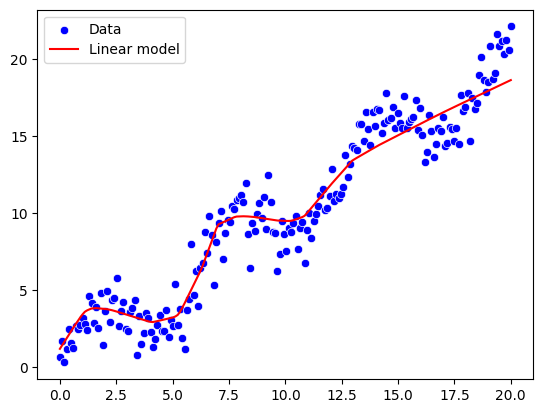

In [276]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
